# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from scipy.stats import linregress

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

590

In [5]:
# Dependencies
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
from config import api_key
from pprint import pprint

# Generate API

In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [7]:
# set up lists to hold reponse info
lat = []
temp = []
humidity=[]
cloudiness=[]
wind_speed=[]

for city in cities:
    response = requests.get(query_url + city).json()
    lat.append(response['coord']['lat'])
    temp.append(response['main']['temp'])

KeyError: 'coord'

In [ ]:
weather_dict = {
    "city": cities,
    "lat": lat,
    "temp": temp
}
weather_data = pd.DataFrame(weather_dict)
weather_data

# Create csv file from API
# Could not get above code to work so everything below uses the csv file instead

In [30]:
cities = "cities.csv"
cities_df = pd.read_csv(cities)
cities_df

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
...,...,...,...,...,...,...,...,...,...,...
543,543,yabrud,0,SY,1558378840,32,33.97,36.66,80.60,8.05
544,544,paraiso,5,MX,1558378898,4,24.01,-104.61,84.20,16.11
545,545,veraval,0,FR,1558378898,62,49.65,0.71,61.00,8.05
546,546,novyy urgal,100,RU,1558378899,93,51.07,132.56,49.74,2.68


In [33]:
#set City as index
cities_df=cities_df[["City","Cloudiness","Humidity","Lat","Lng","Max Temp","Wind Speed"]]
cities_df.head()

,City,Cloudiness,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ostrovnoy,2,72,68.05,39.51,37.50,7.16
1,mahebourg,75,74,-20.41,57.70,78.80,11.41
2,qaanaaq,25,73,77.48,-69.36,22.20,2.37
3,zhuhai,0,39,40.71,112.04,44.60,4.47
4,cape town,20,76,-33.93,18.42,55.99,8.05


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [46]:
# Drop all humidity values>100

cities_df = cities_df.loc[cities_df["Humidity"]<=100]

In [47]:
# Loop through the list of cities and perform a request for data on each

#temperature vs. latitutde
lat = []
temp = []
humidity=[]
cloudiness=[]
wind_speed=[]

for city in cities_df.index:
    lat.append(cities_df['Lat'][city])
    temp.append(cities_df['Max Temp'][city])
    humidity.append(cities_df['Humidity'][city])
    cloudiness.append(cities_df['Cloudiness'][city])
    wind_speed.append(cities_df['Wind Speed'][city])



## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0.5, 1.0, 'Temperature as a function of Latitude')

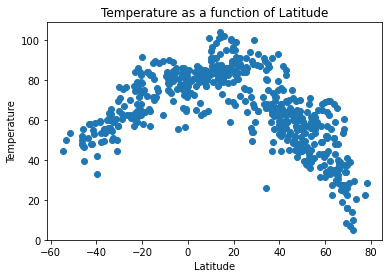

In [48]:
# Temperature (F) vs. Latitude
plt.scatter(lat,temp)
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Temperature as a function of Latitude")

#The below scatter plot shows that as the latitude approaches the equator (at 0) the average temperature rises.
#As the temperature moves farther away from the equator again the temperature starts to drop again. 

## Latitude vs. Humidity Plot

Text(0.5, 1.0, 'Humidity as a function of Latitude')

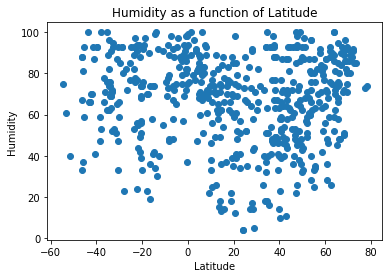

In [49]:
# Humidity (%) vs. Latitude
plt.scatter(lat,humidity)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity as a function of Latitude")

#The below scatter shows there is no direct relationship between humidity and latitude. 

## Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'Cloudiness as a function of Latitude')

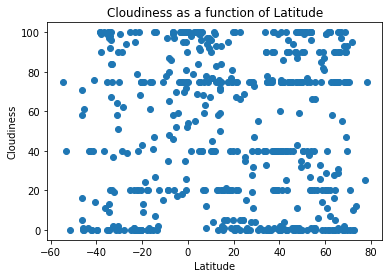

In [50]:
# Cloudiness (%) vs. Latitude
plt.scatter(lat,cloudiness)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness as a function of Latitude")

#The below scatter shows there is no direct relationship between cloudiness and latitude. 

## Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'Wind speed as a function of Latitude')

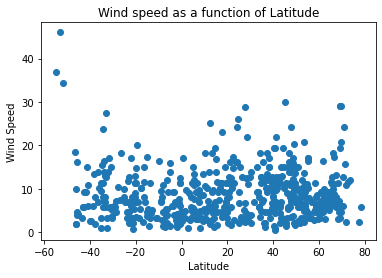

In [51]:
# Wind Speed (mph) vs. Latitude
plt.scatter(lat,wind_speed)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind speed as a function of Latitude")

#The below scatter shows there is no direct relationship between wind speed and latitude.

## Linear Regression for northern and southern hemispheres

In [ ]:
north_lat = []
south_lat=[]
north_temp = []
south_temp=[]
north_humidity=[]
south_humidity=[]
north_cloudiness=[]
south_cloudiness=[]
north_wind_speed=[]
south_wind_speed=[]

cities_df = cities_df.loc[cities_df["Humidity"]<=100]

for city in cities_df.index:
    north_lat.append(cities_df['Lat']>=0[city])
    temp.append(cities_df['Max Temp'][city])
    humidity.append(cities_df['Humidity'][city])
    cloudiness.append(cities_df['Cloudiness'][city])
    wind_speed.append(cities_df['Wind Speed'][city])

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Text(0.5, 1.0, 'Temperature as a function of Latitude')

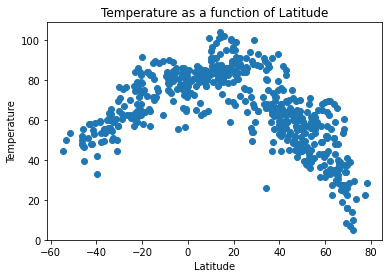

In [53]:
lat=
plt.scatter(lat,temp)
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Temperature as a function of Latitude")






In [54]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(lat, temp)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression